### Simulating From the Null Hypothesis

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

  The null: Average height for coffee drinkers is the same as the average height for coffee drinkers (=)
  The alternative: Average height for coffee drinkers is different from the average height for coffee drinkers (!=)

### Solution:
Null: The average height for all coffee drinkers is the same as the average height for all non-coffee drinkers.  
Alternative: The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers.  
Remember, hypothesis tests are about an entire population of interest.

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

Null: the average height for coffee drinkers is greater than or equal to non-coffee drinkers  
Alternative: the average height for coffee drinkers is less than non-coffee drinkers

### Solution:
Null: The average height for all coffee drinkers is the same  or greater than the average height for all non-coffee drinkers.  
Alternative: The average height for all coffee drinkers is less than the average height for all non-coffee drinkers.  
The equality portion belongs in the null, and the statement we are trying to prove generally appears in the alternative. Unlike in the first case, this question had a directional component associated with it.

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [3]:
boot_diffs, coff_means, no_coff_means = [], [], []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace = True)
    coff_drinkers = bootsample[bootsample.drinks_coffee == True]['height'].mean()
    coff_means.append(coff_drinkers)
    no_coff_drinkers = bootsample[bootsample.drinks_coffee == False]['height'].mean()
    no_coff_means.append(no_coff_drinkers)
    boot_diffs.append(coff_drinkers - no_coff_drinkers)

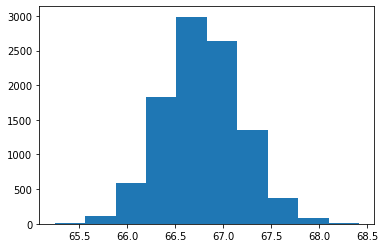

In [4]:
# The standard deviation of the sampling distribution for the mean of those that do not drink coffee.
np.std(no_coff_means)
plt.hist(no_coff_means);

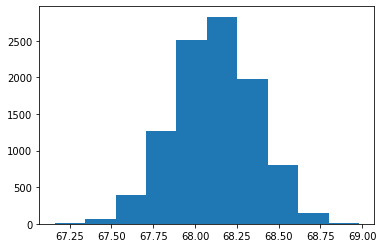

In [5]:
# The standard deviation of the sampling distribution for the mean of those that drink coffee.
np.std(coff_means)
plt.hist(coff_means);

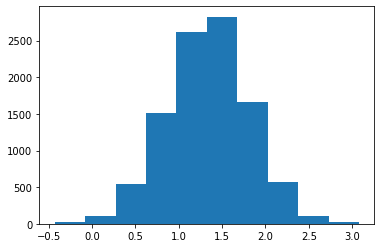

In [6]:
# The standard deviation of the sampling distribution for the difference in means of those that drink coffee 
# and those that do not.
np.std(boot_diffs)
plt.hist(boot_diffs);

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis. If there is truly no difference, then the difference between the means should be zero.**

In [7]:
# Here are 10000 draws from the sampling distribution under the null
null_vals = np.random.normal(0, np.std(boot_diffs), 10000) 

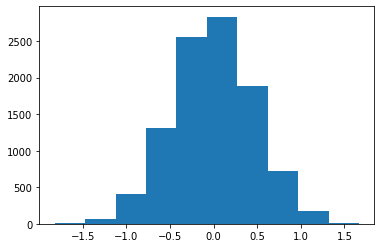

In [8]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

In [9]:
coff_drinkers = sample_data[sample_data.drinks_coffee == True]['height'].mean()
no_coff_drinkers = sample_data[sample_data.drinks_coffee == False]['height'].mean()
coff_drinkers - no_coff_drinkers

1.334707109307402

The observed sample mean difference between coffee drinkers and non-coffee drinkers in sample_data appears as though it DIDN'T come from the sampling distribution we simulated for the null hypothesis.